In [91]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Let's import dataset first.

In [92]:
df = pd.read_csv('placement.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [93]:
df.tail()

,cgpa,package
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96
199,6.22,2.33


In [94]:
df.describe()

,cgpa,package
count,200.000000,200.000000
mean,6.990500,2.996050
std,1.069409,0.691644
min,4.260000,1.370000
25%,6.190000,2.487500
50%,6.965000,2.995000
75%,7.737500,3.492500
max,9.580000,4.620000


In [95]:
df.shape

(200, 2)

## Let's observe the data.

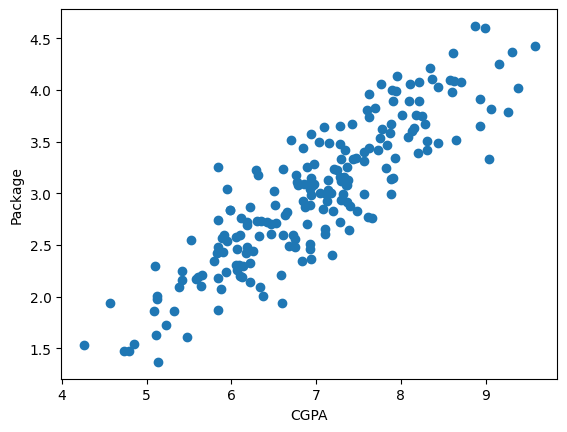

In [96]:
plt.scatter(df['cgpa'], df['package'])
plt.xlabel("CGPA")
plt.ylabel("Package")
plt.show()

We can see that, the above plot looks like a linear regression problem

## Linear Regression Model

In [97]:
# X and y features

X = df.iloc[:,0:1] #all rows, 1st col
y = df.iloc[:,-1] #last col(2nd), all rows

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2) #test_size 0.2 means, 20% data is reserved for testing

In [62]:
print(X_train.shape)
print(y_train.shape)


(160, 1)
(160,)


In [108]:
print("X:", type(X))
print("X_text:", type(X_test))
print("X_train:", type(X_train))
print("y:", type(y))
print("y_test:", type(y_test))
print("y_train:", type(y_train))

X: <class 'pandas.core.frame.DataFrame'>
X_text: <class 'pandas.core.frame.DataFrame'>
X_train: <class 'pandas.core.frame.DataFrame'>
y: <class 'pandas.core.series.Series'>
y_test: <class 'pandas.core.series.Series'>
y_train: <class 'pandas.core.series.Series'>


In [63]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [111]:
#lr.predict(X_test.iloc[0].vlaues)

This will throw error. Because our model expects a single value, but X_test is a numpy array. 

In [120]:
X_test.head()

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57


In [121]:
y_test.head()

112    4.10
29     3.49
182    2.08
199    2.33
193    1.94
Name: package, dtype: float64

In [ ]:
lr.predict(X_test.iloc[0].values.reshape(1,1)) # for 8.58 = 4.10


array([3.89111601])

In [ ]:
lr.predict(X_test.iloc[1].values.reshape(1,1)) # for 7.15 = 3.49

array([3.09324469])

In [125]:
lr.predict(X_test.iloc[2].values.reshape(1,1)) # for 5.88 = 2.08

array([2.38464568])

## Best Fit line

Text(0, 0.5, 'Package (in lpa)')

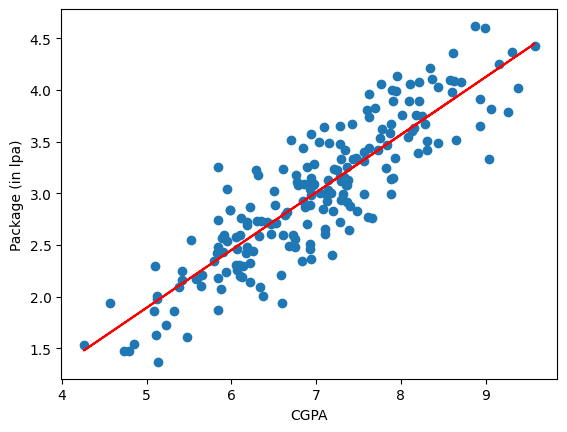

In [138]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train.values,lr.predict(X_train.values),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package (in lpa)')

## Slope(Coefficient) and Intercept

In [143]:
c = lr.intercept_

In [142]:
m = lr.coef_

In [144]:
print("Slope = ", m)
print("Intercept = ", c)

Slope =  [0.55795197]
Intercept =  -0.8961119222429144


In [145]:
type(c)

numpy.float64

In [146]:
type(m)

numpy.ndarray

In [149]:
#y=mx+c

def predict_package(x):
    return m*x+c


x1 = 8.58
predict_package(x1)


array([3.89111601])

In [150]:
predict_package(100)

array([54.89908542])